# Análise exploratória de dados

In [4]:
pip list | grep matplotlib

matplotlib                 3.8.4
matplotlib-inline          0.1.7
Note: you may need to restart the kernel to use updated packages.


In [2]:
from IPython.display import display, Markdown
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


colors = ["#9467bd", "#057476", "#FF7A00"]
sns.set_theme(style="ticks")
sns.set_palette(sns.color_palette(colors))

In [3]:
df = pd.read_csv('../data/raw/data.csv')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## 1. Descrição dos dados

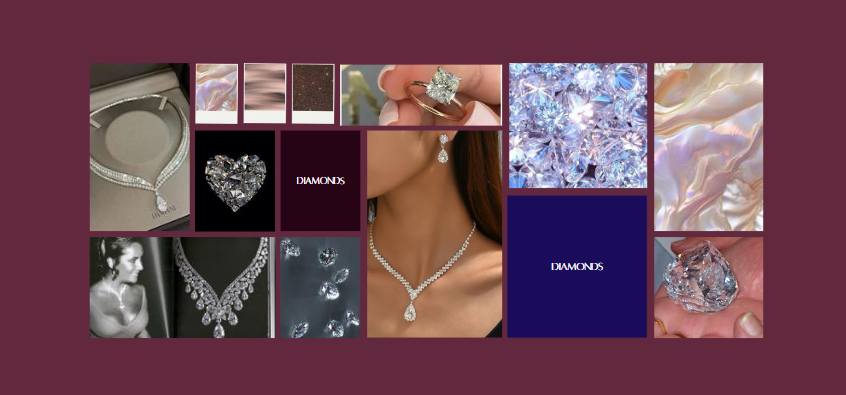

**Prices of over 50,000 round cut diamonds** é um conjunto de dados com informações sobre  diamantes já lapidados. Este dataset conta com informações como preço e outros atributos de quase cinquenta e quatro mil diamantes.

### 2.1. Dicionário de dados

In [4]:
dicionario = pd.read_csv('../data/external/dictionary.csv')
dicionario.head()

,variavel,descrição,tipo,subtipo
0,price,preço em USD,quantitativa,contínua
1,carat,peso do diamante,quantitativa,contínua
2,cut,qualidade do corte,qualitativa,ordinal
3,color,cor do diamante,qualitativa,ordinal
4,clarity,uma medida de quão claro é o diamante,qualitativa,ordinal


* São dez variáveis, sendo sete delas quantitativas contínuas e três qualitativas ordinais.

## 2. Perguntas de partida e hipóteses

* Há dados faltantes neste conjunto de dados?
* O tipo de corte afeta significativamente o preço?
* Podemos chegar em alguma conclusão observando a relação das variáveis quantitativas?
* Diamantes maiores tendem a ser necessariamente os mais valiosos?
* Diamantes maiores possuem maior qualidade?
* Como o preço varia com a cor (color) e a clareza (clarity) dos diamantes?


In [68]:
# colunas (variáveis) contendo valores valtantes
numero_na_coluna = df.isnull().sum().loc[lambda x: x > 0]
numero_na_linha = df.isnull().any(axis=1).sum()

display(numero_na_coluna)
display(Markdown(
    "---\n"
    f"A partir dessa informação sabemos que não temos dados faltantes"
    "\n\n ---"
))

df.dropna(inplace=True)

Series([], dtype: int64)

---
A partir dessa informação sabemos que não temos dados faltantes

 ---

### Qual a distribuição dos dados (variável por variável)?

In [75]:
df.describe(include='all')

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


Distribuição das variáveis qualitativas

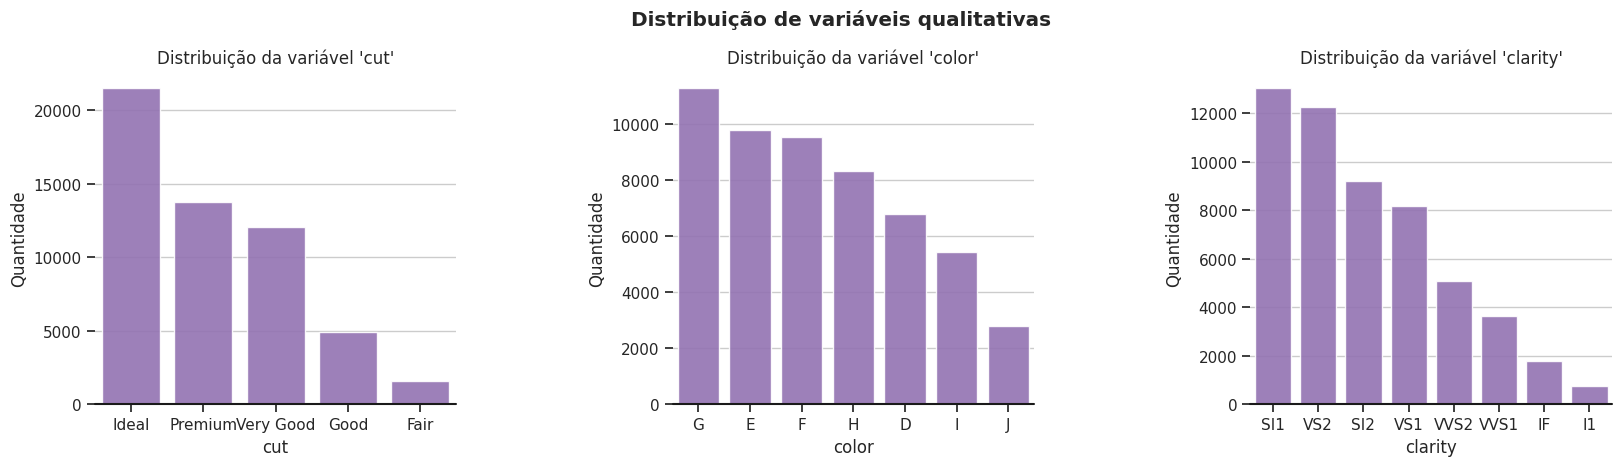

In [56]:
fig, axes = plt.subplots(1, 3, figsize=(17,5))
plt.tight_layout(pad=4, w_pad=10, h_pad=5)
fig.suptitle('Distribuição de variáveis qualitativas', fontweight='bold')
for i, variavel in enumerate(dicionario.query("tipo == 'qualitativa'").variavel.to_list()):
    order = df[variavel].value_counts().index
    ax = sns.countplot(
        data=df,
        x=variavel,
        ax=axes.flatten()[i],
        color=colors[0],
        alpha=0.9,
        order=order
    )
  
    ax.set(frame_on=False)
    ax.axhline(0, color="k", clip_on=False)
    ax.set_title(f"Distribuição da variável '{variavel}'")
    ax.set_ylabel('Quantidade')
    ax.grid(axis='y', linestyle='-')
plt.show()

* Os diamantes com a pior cor e clareza são mais raros que os de melhor


 ---

### Distribuição das variáveis quantitativas

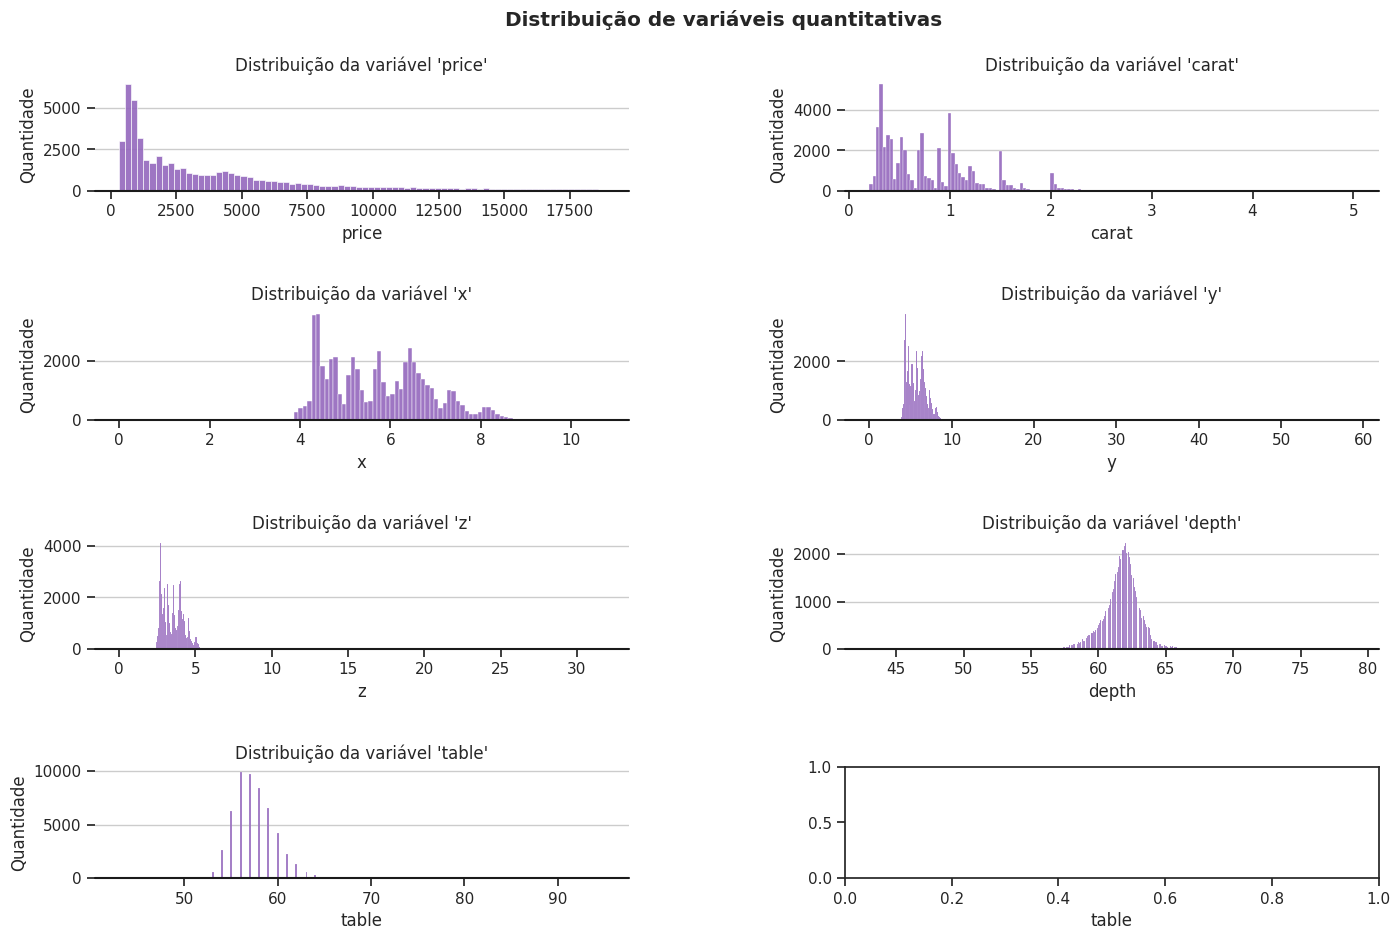

In [7]:
fig, axes = plt.subplots(4, 2, figsize=(15,10))
plt.tight_layout(pad=5, w_pad=10, h_pad=5)
fig.suptitle('Distribuição de variáveis quantitativas', fontweight='bold')
for i, variavel in enumerate(dicionario.query("tipo == 'quantitativa'").variavel.to_list()):
    ax = sns.histplot(
        data=df,
        x=variavel,
        ax=axes.flatten()[i],
        color=colors[0],
        alpha=0.9,
    )
    ax.set(frame_on=False)
    ax.axhline(0, color="k", clip_on=False)
    ax.set_title(f"Distribuição da variável '{variavel}'")
    plt.xlabel(variavel)
    ax.set_ylabel('Quantidade')
    ax.grid(axis='y', linestyle='-')
    # Customize grid to show only vertical lines
plt.show()


* Diamantes baratos são muito mais comuns.
* Há três principais modas de quilate de diamante 

---

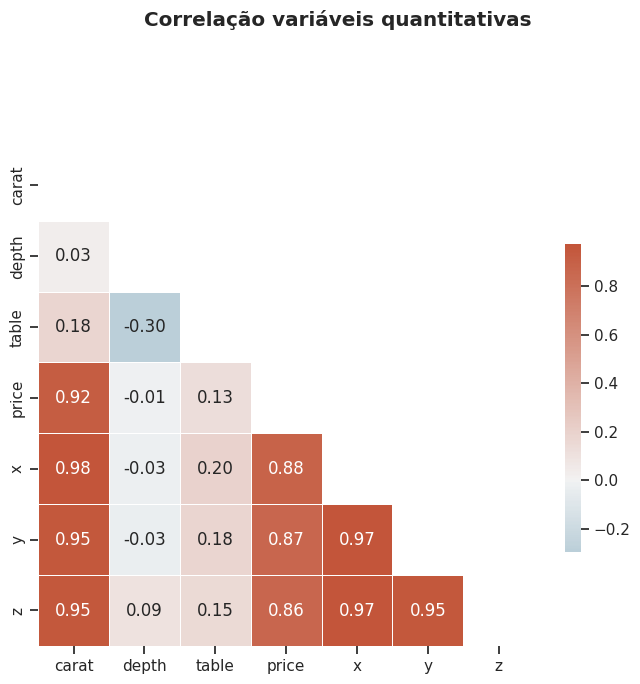

In [69]:

corr = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.figure(figsize=(8, 8))
ax = sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .5},
    annot=True, 
    fmt=".2f"
)
ax.grid(False)

plt.suptitle("Correlação variáveis quantitativas", fontweight='bold')
plt.show()


* Há uma relação clara das dimensões com o valor dos diamantes.
---

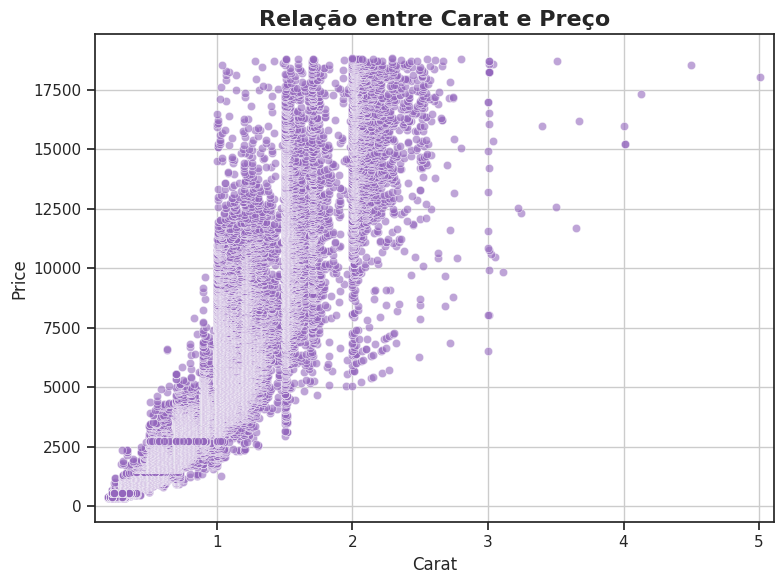

In [67]:
plt.figure(figsize=(8, 6))

sns.scatterplot(
    data=df,
    x='carat',
    y='price',
    alpha=0.6,
    color=colors[0]  
)


plt.xlim(df['carat'].min() - 0.1, df['carat'].max() + 0.1)
plt.ylim(df['price'].min() - 1000, df['price'].max() + 1000)

plt.title('Relação entre Carat e Preço', fontsize=16, fontweight='bold')
plt.xlabel('Carat')
plt.ylabel('Price')

plt.tight_layout()

plt.grid(True)
plt.show()

* O preço varia de acordo com o quilate até certo momento e depois estabiliza.
* Diamantes entre um e dois quilates são os mais comuns.
---

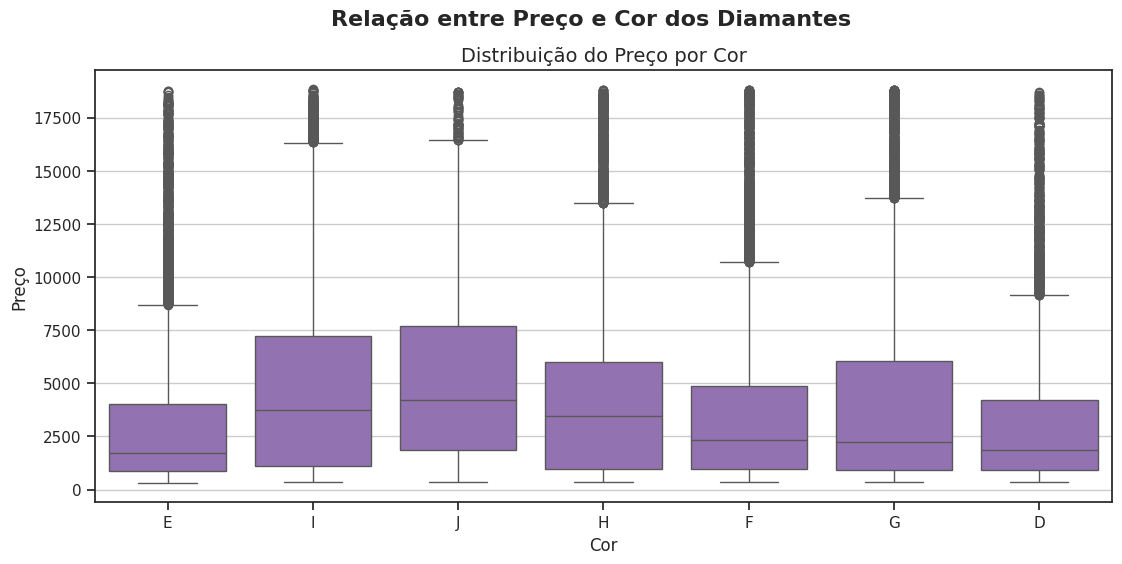

In [10]:

fig, axes = plt.subplots(1, 1, figsize=(12, 6))  
plt.tight_layout(pad=4, w_pad=2, h_pad=5)
fig.suptitle('Relação entre Preço e Cor dos Diamantes', fontweight='bold', fontsize=16)


ax = sns.boxplot(
    x="color",  
    y="price",  
    color=colors[0],
    data=df,
    ax=axes,
    
)

ax.grid(axis='y', linestyle='-')
ax.set_title('Distribuição do Preço por Cor', fontsize=14)
ax.set_xlabel('Cor', fontsize=12)
ax.set_ylabel('Preço', fontsize=12)

plt.show()


* Há uma grande quantidade de valores discrepantes nos diamantes de melhores cores.
---

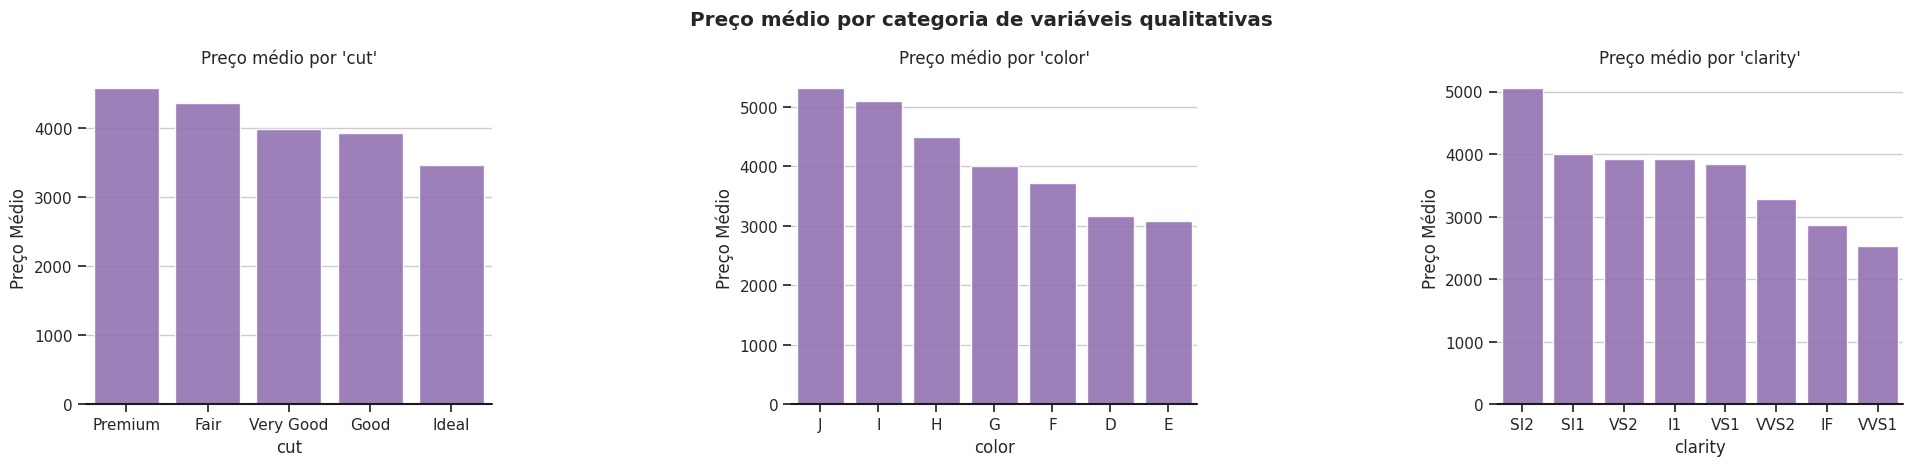

In [58]:

fig, axes = plt.subplots(1, 3, figsize=(20, 5))
plt.tight_layout(pad=4, w_pad=15, h_pad=6)
fig.suptitle('Preço médio por categoria de variáveis qualitativas', fontweight='bold')

for i, variavel in enumerate(dicionario.query("tipo == 'qualitativa'").variavel.to_list()):
    order = df.groupby(variavel)['price'].mean().sort_values(ascending=False).index
    
    ax = axes.flatten()[i]
    mean_prices = df.groupby(variavel)['price'].mean().reindex(order)
    

    sns.barplot(
        x=mean_prices.index,
        y=mean_prices.values,
        ax=ax,
        color=colors[0],  
        alpha=0.9,
        dodge=False,
        legend=False
    )
    
    ax.set(frame_on=False)
    ax.axhline(0, color="k", clip_on=False)
    ax.set_title(f"Preço médio por '{variavel}'")
    ax.set_ylabel('Preço Médio')
    ax.set_xlabel(variavel)
    ax.grid(axis='y', linestyle='-')

plt.show()


* Podemos ver que não há muita variação media de valor em razão de caracteristicas físicas.
* A cor considerada pior está sendo apontada com a de maior valor médio.


---

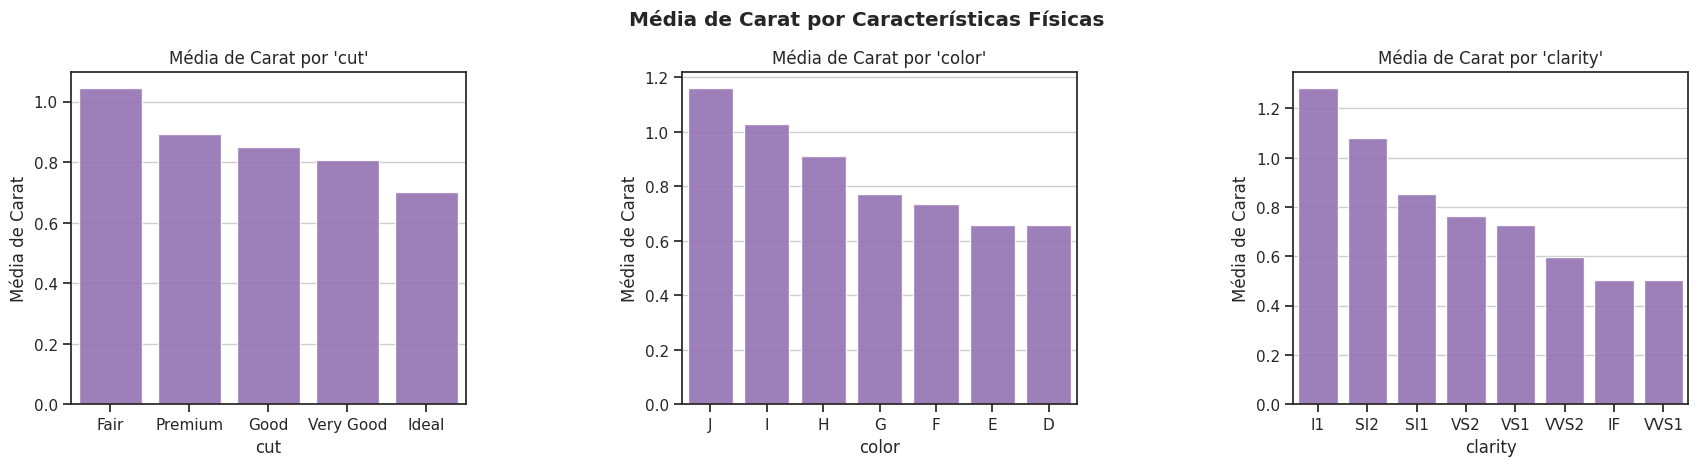

In [49]:

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
plt.tight_layout(pad=4, w_pad=10, h_pad=7)
fig.suptitle('Média de Carat por Características Físicas', fontweight='bold')

caracteristicas = ['cut', 'color', 'clarity']
for i, caracteristica in enumerate(caracteristicas):
    mean_carat = df.groupby(caracteristica)['carat'].mean().sort_values(ascending=False)

    sns.barplot(
        x=mean_carat.index,
        y=mean_carat.values,
        ax=axes.flatten()[i],
        color=colors[0],
        alpha=0.9
    )

    axes.flatten()[i].set_title(f"Média de Carat por '{caracteristica}'")
    axes.flatten()[i].set_ylabel('Média de Carat')
    axes.flatten()[i].set_xlabel(caracteristica)
    axes.flatten()[i].grid(axis='y', linestyle='-')

plt.show()

* Os diamantes de melhores atributos físicos são menores.
* O corte e a cor dos diamantes não são fortemente influenciados pelo peso da pedra.
---

## 3. Insights

Com a ajuda das visualizações criadas, bem como da análise em relação ao dicionário de dados, as informações mais relevantes que conseguimos adquirir são:
* Não há dados faltantes nesse conjunto de dados. 

* Não necessariamente os diamantes com melhores caracteristicas físicas são os mais caros, pois deve ser levado em consideração o peso (quilate) que tem grande influência no preço do diamante.

* Após certo peso há uma estabilização no valor dos diamantes.

* As dimensões (x, y e z) tem grande influência no valor do diamante.

* O corte não apresenta causar grande impacto no valor dos siamantes.

* Diamantes que possuem atributos como clareza IF e cor D são em media pedras menores.